In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx
/kaggle/input/flight-price/Data_Train.xlsx
/kaggle/input/flight-price/Test_set.xlsx
/kaggle/input/flight-price-predict-competition-format/y_test.csv
/kaggle/input/flight-price-predict-competition-format/X_test.csv
/kaggle/input/flight-price-predict-competition-format/y_train.csv
/kaggle/input/flight-price-predict-competition-format/X_train.csv


# IMPORTING NECESSARY DATA LIBRARIES FOR THE PROJECT
Then imported Dataset,
EDA PART,
Data Preprocessing,
Feature engineering, 
feture scaning, 
model building 


In [3]:
df= pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df= df.dropna()

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.shape

(10682, 11)

In [10]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# EDA & Data Preprocessing 

In [12]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
df['journey_day']=pd.to_datetime(df.Date_of_Journey, format= "%d/%m/%Y").dt.day
df['journey_month']=pd.to_datetime(df.Date_of_Journey, format= "%d/%m/%Y").dt.month

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
df.drop(["Date_of_Journey"],axis=1, inplace=True)

In [16]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [17]:
df["dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
                        

In [18]:
df.drop(["Dep_Time"],axis=1,inplace=True)

In [19]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [20]:
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [21]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [22]:
duration=list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]
    
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep= "h")[0]))
    duration_mins.append(int(duration[i].split(sep= "m")[0].split()[-1]))


In [23]:
df["Duration_hours"]= duration_hours
df["Duration_mins"]= duration_mins

In [24]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [25]:
df.drop(["Duration"],axis=1, inplace=True)

In [26]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [27]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

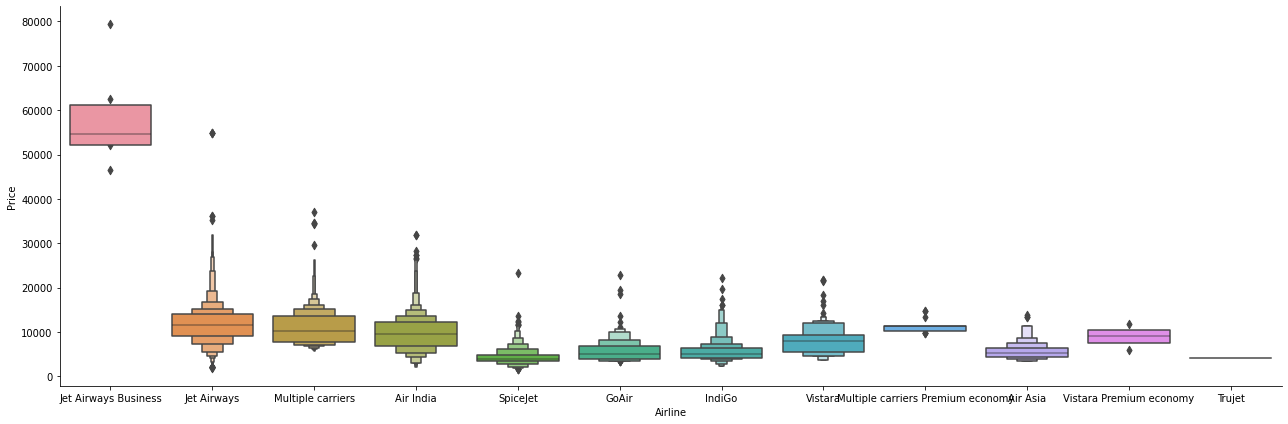

In [28]:
sns.catplot(y = "Price" , x= "Airline", data= df.sort_values("Price",ascending= False),kind="boxen", height=6, aspect=3)

In [29]:
df["Total_Stops"]=df["Total_Stops"].replace('non-stop','0 stop')

In [30]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0 stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0 stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0 stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0 stop,No info,12648,1,3,11,30,14,10,2,40


In [31]:
df["Total_Stops"].isnull().sum()

0

In [32]:
df["Stops"]=df["Total_Stops"].str.split(' ').str[0]

In [33]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 stop,No info,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,1


In [34]:
df['Route1']=df['Route'].str.split('→ ').str[0]
df['Route2']=df['Route'].str.split('→ ').str[1]
df['Route3']=df['Route'].str.split('→ ').str[2]
df['Route4']=df['Route'].str.split('→ ').str[3]
df['Route5']=df['Route'].str.split('→ ').str[4]

In [35]:
df['Route1'].fillna("None",inplace=True)
df['Route2'].fillna("None",inplace=True)
df['Route3'].fillna("None",inplace=True)
df['Route4'].fillna("None",inplace=True)
df['Route5'].fillna("None",inplace=True)

In [36]:
df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,...,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 stop,No info,3897,24,3,22,...,1,10,2,50,0,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,...,13,15,7,25,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,...,4,25,19,0,2,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,...,23,30,5,25,1,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,...,21,35,4,45,1,BLR,NAG,DEL,None,None


In [37]:
df=df.drop(['Route','Total_Stops','Additional_Info'],axis=1)

In [38]:
df.head()

,Airline,Source,Destination,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2,50,0,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7,25,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19,0,2,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5,25,1,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4,45,1,BLR,NAG,DEL,None,None


In [39]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Price             0
journey_day       0
journey_month     0
dep_hour          0
dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
Stops             0
Route1            0
Route2            0
Route3            0
Route4            0
Route5            0
dtype: int64

In [40]:
df.shape

(10682, 18)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
df.head()

,Airline,Source,Destination,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2,50,0,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7,25,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19,0,2,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5,25,1,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4,45,1,BLR,NAG,DEL,None,None


In [44]:
df["Airline"]= le.fit_transform(df["Airline"])
df["Source"]= le.fit_transform(df["Source"])
df["Destination"]= le.fit_transform(df["Destination"])
df["Route1"]= le.fit_transform(df["Route1"])
df["Route2"]= le.fit_transform(df["Route2"])
df["Route3"]= le.fit_transform(df["Route3"])
df["Route4"]= le.fit_transform(df["Route4"])
df["Route5"]= le.fit_transform(df["Route5"])

In [45]:
df.head()

,Airline,Source,Destination,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Stops,Route1,Route2,Route3,Route4,Route5
0,3,0,5,3897,24,3,22,20,1,10,2,50,0,0,13,24,12,4
1,1,3,0,7662,1,5,5,50,13,15,7,25,2,2,25,1,3,4
2,4,2,1,13882,9,6,9,25,4,25,19,0,2,3,32,4,5,4
3,3,3,0,6218,12,5,18,5,23,30,5,25,1,2,34,3,12,4
4,3,0,5,13302,1,3,16,50,21,35,4,45,1,0,34,8,12,4


# Model Buling Using Various Machine Learning Algorithms 

In [46]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [47]:
X.head()

,Airline,Source,Destination,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Stops,Route1,Route2,Route3,Route4,Route5
0,3,0,5,24,3,22,20,1,10,2,50,0,0,13,24,12,4
1,1,3,0,1,5,5,50,13,15,7,25,2,2,25,1,3,4
2,4,2,1,9,6,9,25,4,25,19,0,2,3,32,4,5,4
3,3,3,0,12,5,18,5,23,30,5,25,1,2,34,3,12,4
4,3,0,5,1,3,16,50,21,35,4,45,1,0,34,8,12,4


In [48]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

# Feature Scalling Using Lasso 

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
model = SelectFromModel(Lasso(alpha= 0.005,random_state=0))

NameError: name 'SelectFromModel' is not defined

In [ ]:
 model.fit(X_train,y_train)

In [ ]:
model.get_support()

In [ ]:
selected_features= X_train.columns[(model.get_support())]

In [ ]:
selected_features

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr =ExtraTreesRegressor()


In [ ]:
etr.fit(X_train, y_train)

plt.style.use("ggplot")
plt.figure(figsize=(15,8))
feature_importances= pd.Series(etr.feature_importances_,index=X.columns)
feature_importances.nlargest(35).plot(kind='bar')

# Model Building Using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_prd=rf.predict(X_test)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_prd)
plt.show()

In [ ]:
 plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_prd,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_prd")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test,y_prd))
print('MSE', metrics.mean_squared_error(y_test,y_prd))
print('MAE',np.sqrt(metrics.mean_squared_error(y_test,y_prd)))

In [ ]:
metrics.r2_score(y_test,y_prd)

# Hyperparameter Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(X) for X in np.linspace(start=100,stop=1500,num=15)]
max_features=["auto","sqrt"]
max_depth=[int(X) for X in np.linspace(5,30,num=6)]
min_samples_split=[2,3,5,7,10,15,100]
min_samples_leaf= [1,2,3,5,8,10]

In [ ]:
X.info()

In [ ]:
X

In [ ]:
X["Stops"].unique()

In [ ]:
X['Stops'] = df['Stops'].astype('int')

In [ ]:
X.info()

In [ ]:
param_grid={'n_estimators':n_estimators,
              'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_samples_leaf}

In [ ]:
rf_random =RandomizedSearchCV(estimator=rf,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,verbose=2,random_state=42,n_jobs=3)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf=RandomForestRegressor(n_estimators= 700,
 min_samples_split= 3,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 15)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
ypred1=rf.predict(X_test)

In [ ]:
ypred1

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred1)
plt.show()

In [ ]:
 plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(y_test,ypred1,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("ypred1")
plt.show()

In [ ]:
 rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)